# Breast Cancer Dataset - Tensorflow

### Data from:

https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

### Objectives:

Based on the breast cancer dataset, the aim of this study is to predict if the class 
of the tumor is malignant or benign using tensorflow. In this project no exploratory data analysis will be performed, but if you wish to see some you can access our other project "Breast Cancer Diagnostic - Support Vector Machine.ipynb".

### Import the libraries and the dataset

In [19]:
# Import the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [20]:
# Import the dataset
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [21]:
# The dataset is presented in a dictionary form
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [22]:
# Let's read the description of the dataset available to us.
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

#### Setting Up the Data

In [23]:
# Dataframe for the features
df_feat = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
df_feat.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [24]:
# Dataframe for the target
df_target = pd.DataFrame(cancer['target'],columns=['Cancer'])
df_target.head(3)

,Cancer
0,0
1,0
2,0


In [25]:
# Concat the dataframes
df = pd.concat([df_feat, df_target], axis=1)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Cancer
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

### Split the Dataset

Let's start by splitting our data into a training set.

In [27]:
# Let's import the split library
from sklearn.model_selection import train_test_split

In [28]:
# Let's split the data
X_train, X_test, y_train, y_test = train_test_split(df.drop('Cancer', axis=1), df['Cancer'], test_size=0.30)
N, D = X_train.shape

### Scale the Dataset

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Build the Model

In [30]:
# Let's import the libraries first
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

In [31]:
# Building the model
model = Sequential()

model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1, input_shape=(D,),activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Trainning the Model

In [32]:
# Import the library for an early stop 
from tensorflow.keras.callbacks import EarlyStopping

In [33]:
# Set up an early stop
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [34]:
# Train the model
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
13/13 [==============================] - 0s 9ms/step - loss: 0.8636 - accuracy: 0.6055 - val_loss: 0.4922 - val_accuracy: 0.8480
Epoch 2/600
13/13 [==============================] - 0s 3ms/step - loss: 0.6686 - accuracy: 0.6508 - val_loss: 0.3688 - val_accuracy: 0.9415
Epoch 3/600
13/13 [==============================] - 0s 2ms/step - loss: 0.5212 - accuracy: 0.7437 - val_loss: 0.2970 - val_accuracy: 0.9532
Epoch 4/600
13/13 [==============================] - 0s 2ms/step - loss: 0.4940 - accuracy: 0.7889 - val_loss: 0.2443 - val_accuracy: 0.9649
Epoch 5/600
13/13 [==============================] - 0s 2ms/step - loss: 0.4258 - accuracy: 0.8166 - val_loss: 0.2062 - val_accuracy: 0.9649
Epoch 6/600
13/13 [==============================] - 0s 2ms/step - loss: 0.4078 - accuracy: 0.8191 - val_loss: 0.1794 - val_accuracy: 0.9708
Epoch 7/600
13/13 [==============================] - 0s 2ms/step - loss: 0.3984 - accuracy: 0.8317 - val_loss: 0.1590 - val_accuracy: 0.9708
Epoch 8/600
1

Epoch 59/600
13/13 [==============================] - 0s 3ms/step - loss: 0.1011 - accuracy: 0.9598 - val_loss: 0.0310 - val_accuracy: 0.9825
Epoch 60/600
13/13 [==============================] - 0s 2ms/step - loss: 0.1089 - accuracy: 0.9774 - val_loss: 0.0320 - val_accuracy: 0.9825
Epoch 61/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0942 - accuracy: 0.9724 - val_loss: 0.0318 - val_accuracy: 0.9825
Epoch 62/600
13/13 [==============================] - 0s 3ms/step - loss: 0.1053 - accuracy: 0.9698 - val_loss: 0.0313 - val_accuracy: 0.9825
Epoch 63/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0835 - accuracy: 0.9648 - val_loss: 0.0310 - val_accuracy: 0.9825
Epoch 64/600
13/13 [==============================] - 0s 2ms/step - loss: 0.1022 - accuracy: 0.9799 - val_loss: 0.0316 - val_accuracy: 0.9825
Epoch 65/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0967 - accuracy: 0.9774 - val_loss: 0.0313 - val_accuracy: 0.9825
Epoch 

13/13 [==============================] - 0s 3ms/step - loss: 0.0694 - accuracy: 0.9824 - val_loss: 0.0235 - val_accuracy: 0.9825
Epoch 117/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0799 - accuracy: 0.9799 - val_loss: 0.0244 - val_accuracy: 0.9883
Epoch 118/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0545 - accuracy: 0.9774 - val_loss: 0.0247 - val_accuracy: 0.9883
Epoch 119/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0716 - accuracy: 0.9749 - val_loss: 0.0256 - val_accuracy: 0.9825
Epoch 120/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0749 - accuracy: 0.9724 - val_loss: 0.0243 - val_accuracy: 0.9825
Epoch 121/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0655 - accuracy: 0.9749 - val_loss: 0.0235 - val_accuracy: 0.9825
Epoch 122/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0828 - accuracy: 0.9724 - val_loss: 0.0240 - val_accuracy: 0.9825
Epoch 123/600

###  Model Evaluation

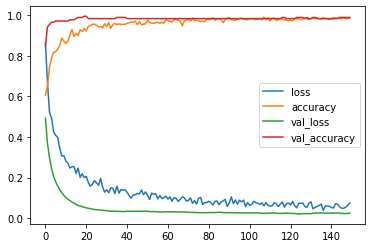

In [35]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [36]:
# Evaluate the model - evaluate() returns loss and accuracy
print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

13/13 [==============================] - 0s 921us/step - loss: 0.0301 - accuracy: 0.9899
Train score: [0.0301002636551857, 0.9899497628211975]
6/6 [==============================] - 0s 836us/step - loss: 0.0252 - accuracy: 0.9883
Test score: [0.02516816183924675, 0.988304078578949]


In [40]:
predictions = model.predict(X_test)

In [45]:
# Round to get the actual predictions
# Note: has to be flattened since the targets are size (N,) while the predictions are size (N,1)
predictions = np.round(predictions).flatten()
print(predictions)

[1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0.
 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1.
 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1.
 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0.
 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0.
 0. 1. 1.]


In [46]:
# Calculate the accuracy, compare it to evaluate() output
print("Manually calculated accuracy:", np.mean(predictions == y_test))
print("Evaluate output:", model.evaluate(X_test, y_test))

Manually calculated accuracy: 0.9883040935672515
6/6 [==============================] - 0s 997us/step - loss: 0.0252 - accuracy: 0.9883
Evaluate output: [0.02516816183924675, 0.988304078578949]


In [47]:
# Let's now save our model to a file
model.save('breastcancer.h5')